<h1> <center> CNN Model for Handwritten Character Recognitions </center> </h1>

In [1]:
# import libraries needed for 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(777)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
from sklearn.preprocessing import MinMaxScaler

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')

# 1. Load data 

In [2]:
data = pd.read_csv("A_Z Handwritten Data.csv")
data = data.astype('float32')
#rename the label column
data1 = data.rename(columns={'0': 'label'})

In [3]:
X = data1.drop('label', axis=1)
y = data1['label']
# split data
trainX, testX, trainY, testY = train_test_split(X,y)

## 1.1 Display of a Sample Characters

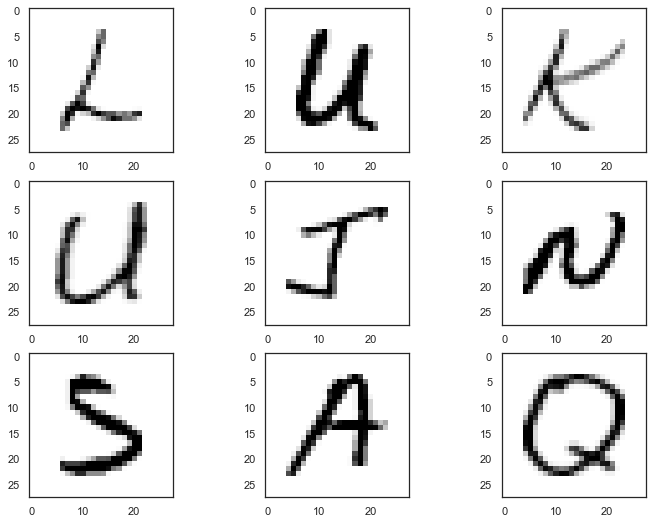

In [4]:
# show a sample of the images
plt.figure(figsize = (12,9))
row, colums = 3, 3
for i in range(9):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X.sample(9).iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

## 1.2 Data Pro-processing 

In [5]:
# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(trainX)

trainX = standard_scaler.transform(trainX)
testX = standard_scaler.transform(testX)

In [6]:
# reshape data
trainX = trainX.reshape(trainX.shape[0],28,28,1).astype('float32')
testX = testX.reshape(testX.shape[0],28,28,1).astype('float32')

In [7]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
trainY = to_categorical(trainY, num_classes = 26)
testY = to_categorical(testY, num_classes = 26)

# 2. CNN Model

In [8]:
# Set the CNN model 
# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

myCNN = Sequential()

myCNN.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
myCNN.add(MaxPool2D(pool_size=(2,2)))
myCNN.add(Dropout(0.25))

myCNN.add(Flatten())
myCNN.add(Dense(128, activation = "relu"))
myCNN.add(Dropout(0.5))
myCNN.add(Dense(len(y.unique()), activation = "softmax"))

In [9]:
# Compile the model
myCNN.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [15]:
epochs = 35
batch_size = 200

In [ ]:
# Fit the model with augmented data
CNN_run = myCNN.fit(trainX, trainY, batch_size = batch_size, epochs = epochs, validation_data = (testX, testY), verbose = 2)

Epoch 1/35
1397/1397 - 196s - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0487 - val_accuracy: 0.9912
Epoch 2/35
1397/1397 - 184s - loss: 0.0615 - accuracy: 0.9809 - val_loss: 0.0509 - val_accuracy: 0.9910
Epoch 3/35
1397/1397 - 198s - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0511 - val_accuracy: 0.9909
Epoch 4/35
1397/1397 - 188s - loss: 0.0599 - accuracy: 0.9813 - val_loss: 0.0489 - val_accuracy: 0.9915
Epoch 5/35
1397/1397 - 197s - loss: 0.0588 - accuracy: 0.9816 - val_loss: 0.0484 - val_accuracy: 0.9918
Epoch 6/35
1397/1397 - 228s - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.0473 - val_accuracy: 0.9921
Epoch 7/35
1397/1397 - 191s - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.0478 - val_accuracy: 0.9921
Epoch 8/35
1397/1397 - 208s - loss: 0.0555 - accuracy: 0.9823 - val_loss: 0.0515 - val_accuracy: 0.9921
Epoch 9/35
1397/1397 - 201s - loss: 0.0547 - accuracy: 0.9824 - val_loss: 0.0509 - val_accuracy: 0.9926
Epoch 10/35
1397/1397 - 203s - loss: 0.0526 - accuracy: 0.9829 -

## 2.1 Display of Learning Progress

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(CNN_run.history['loss'])
plt.plot(CNN_run.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(CNN_run.history['accuracy'])
plt.plot(CNN_run.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')
plt.show()

## 2.2 Confusion Matrix for Classification

In [ ]:
conf_mat=confusion_matrix(testY.argmax(axis=1),myCNN.predict(testX).argmax(axis=1))
conf_mat_df = pd.DataFrame(conf_mat, range(26),range(26))
plt.figure(figsize = (20,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_mat_df, annot=True,annot_kws={"size": 16},cmap="YlGnBu")# font size